In [288]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score

In [289]:
##predict weight of fish

In [358]:
data = pd.read_csv('C:\\Users\\Zara\\Desktop\\fish\\Fish.csv')

In [328]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [359]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [329]:
#check nulls 
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [330]:
#check no of unique species
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

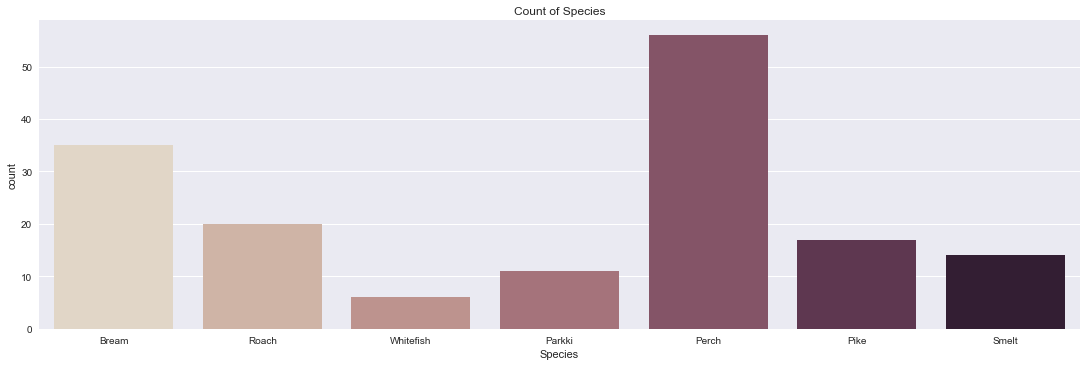

In [331]:
#plot count of species
sns.catplot(x="Species", kind="count", palette="ch:.25", data=data, height=5, aspect=3).set(title = 'Count of Species')

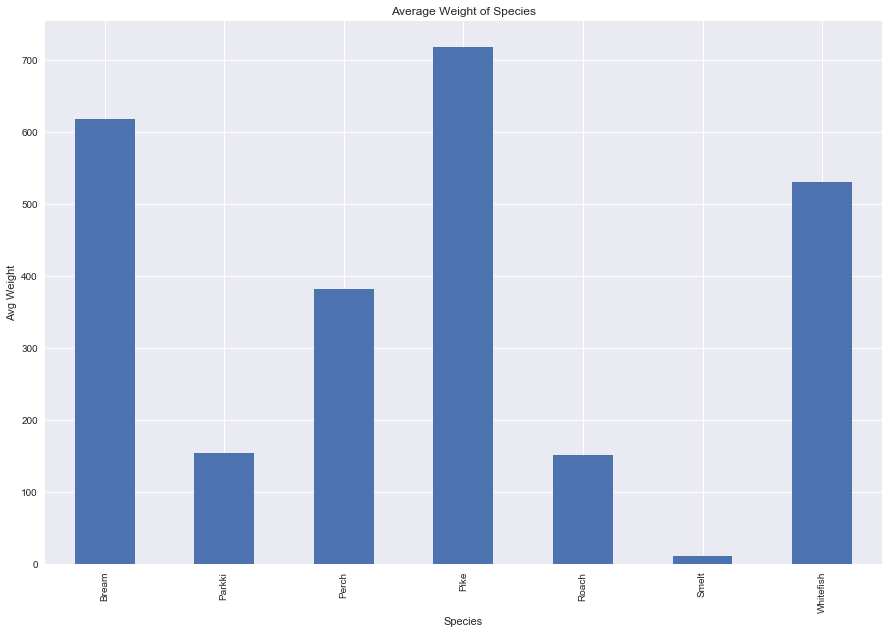

In [332]:
#average weights of fish against species
avg_weights = data.groupby('Species')['Weight'].mean()
plt.figure(figsize = (15,10))
avg_weights.plot(kind = 'bar')
plt.ylabel('Avg Weight')
plt.title('Average Weight of Species')
plt.show()

In [333]:
#Pearson's correlation 
data[data.columns[1:]].corr()['Weight'][:]

#Lenghts are heavily correlated with the weight

Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64

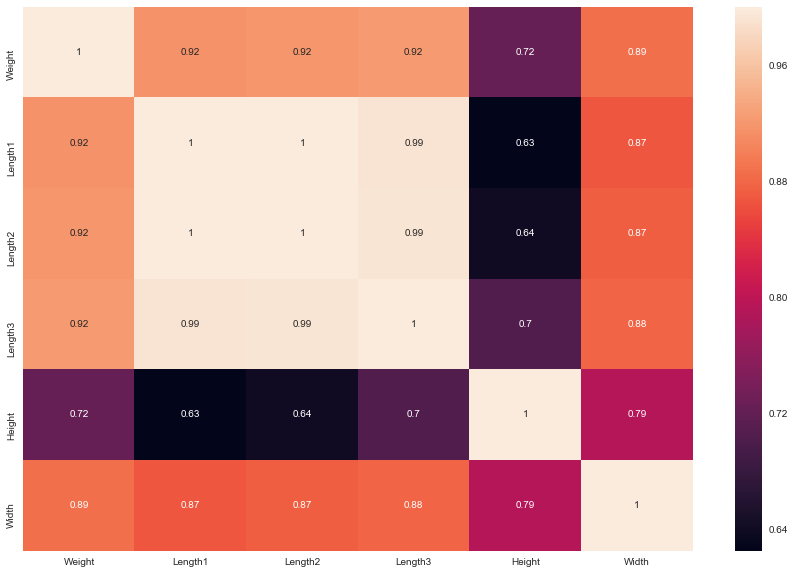

In [334]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True)

In [335]:
#Searching for outliers in weight using IQR
data_weight = data['Weight']
q1 = data_weight.quantile(0.25)
q3 = data_weight.quantile(0.75)
iqr = q3 - q1
lowerend = q1 - (1.5 * iqr)
upperend = q3 + (1.5 * iqr)

In [336]:
outliers = data_weight[(data_weight < lowerend) | (data_weight > upperend)]
outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [337]:
#outliers in dataset

data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [338]:
#removing outliers in dataset
data = data.drop([142,143,144])

In [339]:
#encoding categorical column
cat_species = pd.get_dummies(data['Species'], prefix='species')

In [340]:
data = data.drop(columns = 'Species')

In [341]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [342]:
#concat categorical columns with data
data = pd.concat([data, cat_species], axis = 1)

In [343]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,species_Bream,species_Parkki,species_Perch,species_Pike,species_Roach,species_Smelt,species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [344]:
#separating target column 
X = data.iloc[:,1:]
y = data[['Weight']]

In [345]:
#splitting train and test dataset by 70:30

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [346]:
#size of train and test datasets
print('x_train: ', np.shape(x_train))
print('y_train: ', np.shape(y_train))
print('x_test: ', np.shape(x_test))
print('y_test: ', np.shape(y_test))


x_train:  (109, 12)
y_train:  (109, 1)
x_test:  (47, 12)
y_test:  (47, 1)


# Linear Regression

In [347]:
from sklearn.linear_model import LinearRegression

In [348]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [349]:
#model parameters
print('Model intercept: ', lreg.intercept_)
print('Model coefficients: ', lreg.coef_)

Model intercept:  [-533.37588925]
Model coefficients:  [[  14.27504974   27.21459479  -25.41627433   39.11517488   53.81890016
  -105.10323128  -62.56748889  -27.03339373   -7.14393555  -42.11047516
   231.21889175   12.73963286]]


In [350]:
#prediction on train
y_pred = lreg.predict(x_train)

In [351]:
r2_score(y_train, y_pred)

0.9385535530366509

In [352]:
#prediction on test
y_pred = lreg.predict(x_test)

In [353]:
r2_score(y_test, y_pred)

0.9494059014278792

In [354]:
#comparing predicted and actual values 

result = pd.DataFrame(y_test)
result = result.reset_index(drop= True)
result.head()

,Weight
0,225.0
1,200.0
2,110.0
3,70.0
4,700.0


In [355]:
y_pred_new = pd.DataFrame(y_pred, columns = ['Predicted Weight'])

In [356]:
result = pd.concat([result, y_pred_new], axis = 1)

In [360]:
result

,Weight,Predicted Weight
0,225.0,244.311827
1,200.0,278.732178
2,110.0,124.446303
3,70.0,4.810589
4,700.0,698.585534
5,1000.0,860.814335
6,150.0,141.873593
7,430.0,502.491754
8,145.0,166.004776
9,770.0,693.724659
